# Wskazówki do symulacji losowych - Julia

# Obliczenia wektorowe

In [3]:
# \w Julii obliczenia wektorowe są uniwersalne
# ważne tylko, aby dane i wyniki trzymać w tabliach

X = zeros(1000) # alokujemy 1000 miejsc, wpisujemy zera

# po czym wpisać w nie nasze wyniki w pętli

for k in eachindex(X) # lub k in 1:1000
    X[k] = rand()^2 # jakiś nasz algorytm
end

W Julii zamiast pisać pętle każdą funkcję można aplikować wektorowo operatorem broadcast. Zastosowanie tego operatora gwarantuje, że obliczenia będą wykonane w efektywny wektorowy sposób.

In [4]:
# w przypadku operatorów matematycznych piszem kropkę przed nazwą operatora

X = rand(10)

X .^ 2 # kwadraty zmiennych U(0,1)

10-element Vector{Float64}:
 0.4657813260803594
 0.07655292853861115
 0.0014546456611251922
 0.0008775953423528072
 0.009062686802312312
 0.11580240566092093
 0.427177077949781
 0.6236412497695525
 0.9044180137077649
 0.04968622463830999

In [5]:
# w przypadku funkcji używających nawiasu piszemy kropkę po nazwie funkcji

f(x) = 2x + 3

f.([1,2,3,4])

4-element Vector{Int64}:
  5
  7
  9
 11

In [6]:
# działa dla wszystkich funkcji

function g(x)
    while x < 10
        x *= 2
    end
    return x
end

g.(rand(1,10))

1×10 Matrix{Float64}:
 10.1578  10.2891  13.4613  14.9376  …  17.3047  10.4294  15.6532  11.9504

# Zmienne losowe 

In [7]:
# rand generuje U(0,1) w zadanej ilości
rand(10) # 10 zmiennych U(0,1)
rand(10,10) # macierz 10x10 zmiennych U(0,1)

10×10 Matrix{Float64}:
 0.714424   0.107277   0.023754  0.14788    …  0.956433   0.272106   0.634639
 0.132071   0.272922   0.426372  0.76402       0.0237119  0.484076   0.316232
 0.472412   0.737795   0.113601  0.0690979     0.662269   0.0609009  0.815332
 0.294468   0.0818744  0.464133  0.589587      0.326444   0.935684   0.251506
 0.0280226  0.371029   0.240328  0.935223      0.789155   0.834234   0.140401
 0.69639    0.830793   0.370047  0.0861471  …  0.376489   0.362567   0.149191
 0.473306   0.599815   0.615452  0.238235      0.960209   0.98863    0.841521
 0.739214   0.476575   0.380537  0.145832      0.99207    0.0407965  0.113724
 0.225077   0.89972    0.958558  0.19461       0.185357   0.140557   0.302649
 0.379523   0.907296   0.799218  0.776494      0.121692   0.552155   0.576262

In [8]:
# randn generuje Normal(0,1) w zadanej ilości
randn() # 1 zmienna Normal(0,1)
rand(1,10) # macierz 1x10 zmiennych N(0,1) (tzn. pojedynczy wiersz macierzy)

1×10 Matrix{Float64}:
 0.683543  0.974939  0.53465  0.923948  …  0.179785  0.268178  0.274544

In [10]:
# do losowania z wybranego zbioru można użyć opcjonalnego argumentu rand

set = (1,2, 2.5, 0) # krotka, wektor lub innych format
rand(set,10) # 10 liczb ze zbioru set

10-element Vector{Real}:
 2
 1
 0
 2.5
 1
 2
 2
 0
 1
 2

In [11]:
# w szczególności

rand(1:10,5) # 5 losowych liczb od 1 do 10

5-element Vector{Int64}:
  3
  5
  6
  5
 10

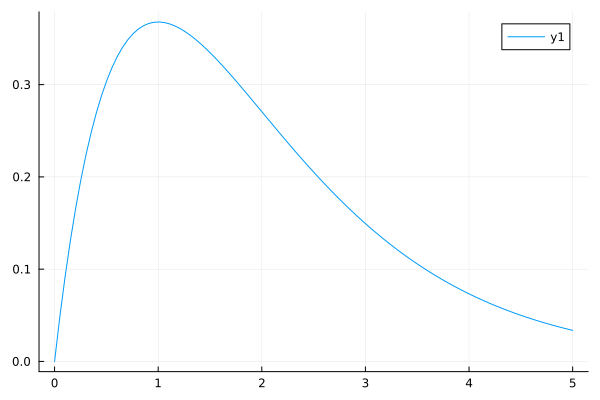

In [4]:
# więcej rozkładów mamy w bibliotece Distributions
# lista rozkładów jest tutaj: https://juliastats.org/Distributions.jl/stable/
using Distributions
using Plots

# przykład

xs = LinRange(0,5,100)
d = Gamma(2,1)

p = pdf.(d,xs) # gęstość Gamma(2,1) od 0 do 5
plot(xs,p)


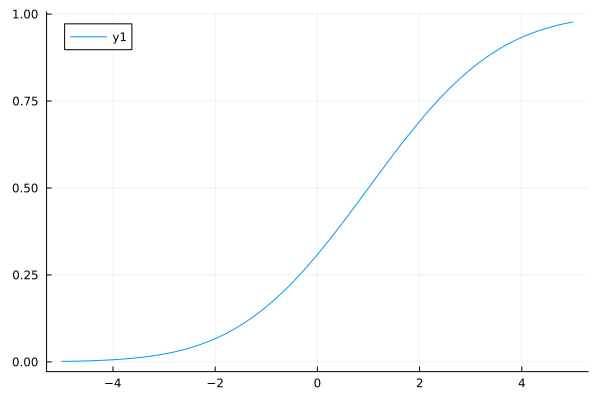

In [5]:
# dystrybuanta jest dostępna pod cdf

xs = LinRange(-5,5,100)

c = cdf.(Normal(1,2),xs) # cdf Normal(1,2) w punktacch xs
plot(xs,c)

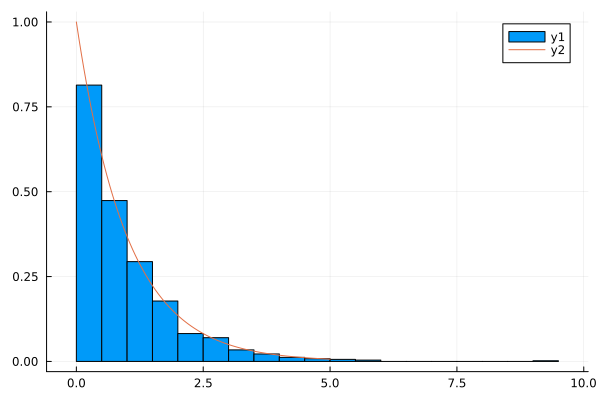

In [14]:
# generowanie zmiennych losowych o zadanym rozkładzie jest dostępne ponownie pod rand

distr = Exponential(1)
X = rand(distr,1000)
histogram(X,bins=30,normalize = true)
xs = LinRange(0,5,100)
plot!(xs,pdf.(distr,xs))  # exp(-xs) w tym przypadku

In [15]:
# znajdowanie parametrów metodą fit

X = 2 .* randn(1000) .+ 1 # rozkład N(1,2)

fit(Normal,X) # powinny wyjść parametry (1,2)

# im większa próba, tym wynik powinien być dokładniejszy

Normal{Float64}(μ=0.8701484885780139, σ=1.8992453953113335)

# Statystyki opisowe

Jak nazwa wskazuje są to metody, które pomagają nam zwizualizować zachowanie zmiennych i procesów losowych. Następnie możemy zweryfikować, czy zachowanie to jest spodziewane, czy też nie. 

Proszę pamiętać, że statystyki podobnie jak i próby są losowe i ich wynik nie jest dokładny. Powinny jednak zbiegać do dokładnego wyniku w kontrolowany sposób, zwykle wraz ze wzrostem próby losowej

In [16]:
# najprostszą formą statystyk są momenty

# komenda |> aplikuje funkcję z prawej strony
# f(x) jest równoważne x |> f

X = randn(1000) .+ 1 # Normal(1,1)
mean(X) |> display # pierwszy moment, powinien być bliko 1
mean(X .^2) |> display # drugi moment, powinien być bliko 2
var(X) |> display # wariancja, powinna być blisko 1
std(X) |> display # odchylenie średniokwadratowe. tj. pierwiastek z wariancji

0.9979771725491173

1.9546957537775214

0.9596970138622528

0.979641267945697

In [17]:
# zależność możemy badać za pomocą korelacji

X = randn(1000)
Y = randn(1000)

cor(X,X) |> display # korelacja bliska 1
cor(X,Y) |> display # korelacja bliska 0


1.0

0.0215629305449156

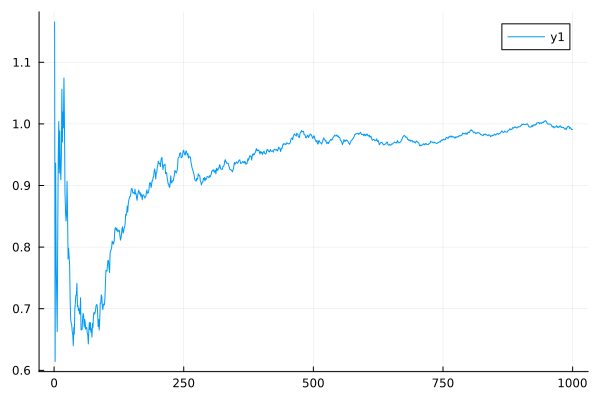

In [18]:
# co do zbieżności, możemy to zilustrować

X = randn(1000) .+ 1

walkingMean = cumsum(X)./ (1:1000) # elementy to  (x1+..+xk)/k

plot(walkingMean) # jak widać zbiega do 1

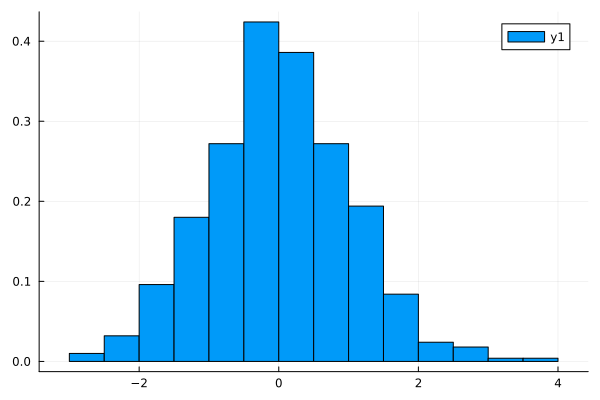

In [19]:
# znamy już histogram, który jest estymatorem gęstości

histogram(randn(1000),normalize=true)

W przypadku robienia histogramu należy uważać na ilość belek. Zbyt mała zniekształca kształ uzyskanego pdfu, ale zbyt duża sprawia, że pojawia się chaotyczne zachowanie. Optymalna ilość belek niestety zależy od rozkładu, więc nie ma dokładnych wytycznych, ale warto nie odchodzić zbyt daleko od pierwiastka długości próby.

Funkcja histogram w Julii stara się sama dobrać odpowiednią, ale należy mieć na uwadze, że czasami trzeba ją poprawić ręcznie atrybutem bins.

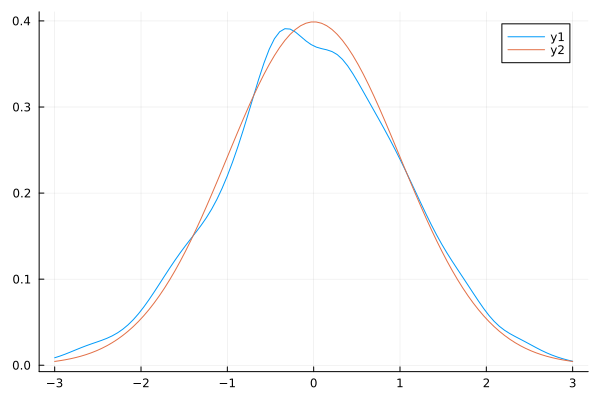

In [6]:
# alternatywą do histogramu jest jądrowy estymator pdf
# działa on dobrze dla zmiennych o gładkich gęstościach
# i krótkich ogonach
# dla dobrego działania może wymagać długich prób losowych
# w Julii mamy KernelDensity

using KernelDensity

den = kde(randn(1000)) # rozkład Normalny jest gładki
xs = LinRange(-3,3,100)
plot(xs,pdf(den,xs)) # estymowane
plot!(xs,pdf.(Normal(0,1),xs)) # dokładne

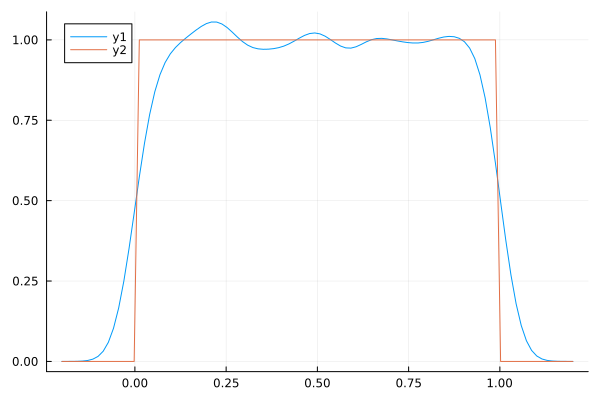

In [7]:
# jak widzimy dla rozkładu U(0,1) ze skokami
# estymator robi błędy w otoczeniu skoków
# które zanikają wolno wraz ze wzrostem długości próby

den = kde(rand(5000))
xs = LinRange(-0.2,1.2,100)
plot(xs,pdf(den,xs)) # estymowane
plot!(xs,pdf.(Uniform(0,1),xs)) # dokładne

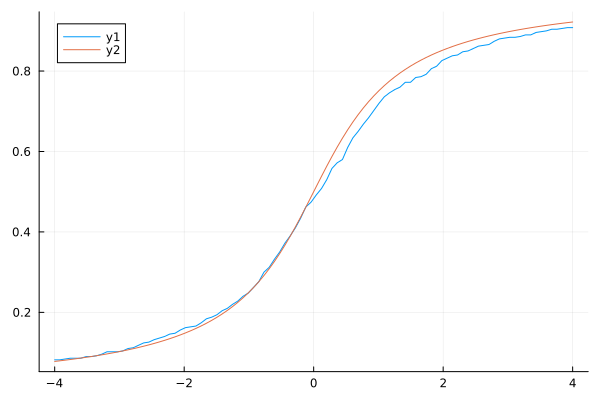

In [8]:
# z kolei cdf jest bardzo łatwy do estymowania
# wymaga relatywnie krótkich prób losowych
# można użyć prostej funkcji ecdf ze StatsBase

using StatsBase

X = rand(Cauchy(0,1),500)
e = ecdf(X)

xs = LinRange(-4,4,100)

plot(xs,e(xs)) # estymowane
plot!(xs,cdf.(Cauchy(0,1),xs)) # teoretyczne

# Testy statystyczne

Testami odpowiadamy na pytanie, czy badana próba zdradza odchylenia od zadanej własności,czy też klasy. Wynik testu również jest losowy, więc gdy sami symulujemy warto go powtórzyć kilkukrotnie, jak też porównywać wyniki kilku testów

Testy zwracają tzw. p-wartość, czyli oszacowane prawdopodobieństwo, że badany odchył cechy może być dziełem przypadku. Duża p-wartość oznacza więc "w normie" a mała potwierdza występowanie osobliwości. Za próg istotności odchyleń zwykle przyjmuje się 0.05, ale w przypadku symulacji warto myśleć nawet o mniejszych wartościach jak 0.005.

In [10]:
# najważniejszym testem, jakiego będziemy używać jest test Kołmogorova-Smirova
# sprawdza on, czy próba ma dystrybuantę jak zadana

# w JuliHypothesisTests zapewnia ogromny wybór testów

using HypothesisTests

X = randn(1000)
ExactOneSampleKSTest(X,Normal(0,1)) # ta p-val to dużo, nie ma odchyleń od rozkładu Normal(0,1)

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.0322142

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.2452

Details:
    number of observations:   1000


In [11]:
X = rand(Exponential(1),1000)
ExactOneSampleKSTest(X,Normal(0,1)) # p-val jest bardzo małe, wykryto odchylenia od rozkładu Normal(0,1)

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.500128

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations:   1000


In [12]:
X = rand(Exponential(1),1000)
ExactOneSampleKSTest(X,Exponential(1)) # p-val = 0.24 to dużo, nie ma odchyleń od Exp(1)

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.025365

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.5323

Details:
    number of observations:   1000


In [13]:
X = randn(1000) .+ 1
ExactOneSampleKSTest(X,Normal(0,1)) # p-val jest bardzo małe, wykryto odchylenia od rozkładu Normal(0,1)

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.414049

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations:   1000


In [14]:
# alternatywą do testu K=S jest test Andersona-Darlinga, który działa podobnie
X = randn(1000)

OneSampleADTest(X,Exponential(1)) # wykrywa odchylenia

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-06

Details:
    number of observations:   1000
    sample mean:              -0.01928686896276674
    sample SD:                1.0145577876886962
    A² statistic:             Inf


In [15]:
X = 2 .* randn(10000)

OneSampleADTest(X,Normal(0,1))

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-07

Details:
    number of observations:   10000
    sample mean:              -0.010649303799488549
    sample SD:                2.0131471017018088
    A² statistic:             2096.5744437991825


Za pomocą testów K-S oraz A-D możemy więc weryfikować, czy próba jest z rozkładu dokładnie takiego, jak zadany. Nie możemy za jego pomocą sprawdzić, czy próba jest z zadanej klasy rozkładów, np. czy jest z dowolnego rozkładu normalnego, a nie tylko jakiegoś konkretnego, np. Normal(0,1). Czasami można próbę przekształcić, aby uniknąć tego problemu. W ogólności trzeba jednak używać innych testów.

Test  Jarque-Bery sprawdza, czy momenty próby zgadzają się z momentami rozkładu normalnego.

In [16]:

X = 2 .* randn(1000) .+ 2

JarqueBeraTest(X) # nie ma odchyleń

Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "0.019586997124374617 and 2.75592406672816"

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.2800

Details:
    number of observations:         1000
    JB statistic:                   2.54615


In [17]:
X = rand(Laplace(0,1),1000) # rozkład Laplace(0,1)
JarqueBeraTest(X) # są odchylenia

Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "-0.46040214232738574 and 5.794222565615581"

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-78

Details:
    number of observations:         1000
    JB statistic:                   360.648


In [18]:
X = randn(1000) .+ rand(1000)

JarqueBeraTest(X) # nie ma odchyleń, a powinny
# większość testów da się oszukać

Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "0.019102502222290357 and 2.730610048793413"

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.2139

Details:
    number of observations:         1000
    JB statistic:                   3.08461


In [19]:
X = randn(1000) .+ 5 .* rand(1000)

JarqueBeraTest(X)  # zwiększone zaburzenie już wychwytuje

Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "0.0063278387786448 and 2.4596625818804676"

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           0.0023

Details:
    number of observations:         1000
    JB statistic:                   12.1719
